# Get Kaggle Kernel Results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from kaggle.api.kaggle_api_extended import KaggleApi

sns.set()

## Connect to Kaggle

In [2]:
api = KaggleApi()
api.authenticate()

## Get Kernels

In [3]:
words = ['arles', 'arose', 'dares', 'lares', 'lores', 'nares',
        'raile', 'raise', 'rales', 'rates', 'reais', 'roate',
        'soare', 'stare', 'tales', 'tares', 'tores']

algos = ['lf', 'gyx', 'lf-pop',
         'gyx-pop'
        ]

In [4]:
for algo in algos:
    for word in words:
        kernel_ref = f'chrischow/wordlebot-{algo}-{word}'
        download_path = f'./kernel_output/{algo}/'
        if algo == 'gyx':
            algo_correct = 'expected_gyx'
        elif algo == 'lf-pop':
            algo_correct = 'lf'
        elif algo == 'gyx-pop':
            algo_correct = 'expected_gyx'
        else:
            algo_correct = algo
        filename = f"wordlebot-{algo_correct}-{word}.csv"
        print(f'Checking {algo}-{word}...', flush=True, end='')
        if not filename in os.listdir(download_path):
            try:
                kernel_status = api.kernels_status(kernel_ref)['status']
            except:
                kernel_status = 'No kernel'
                continue
            if kernel_status == 'complete':
                api.kernels_output(kernel_ref, path=download_path)
                print('Downloaded output.')
            else:
                print('Kernel still running. Output not downloaded.')
        else:
            print('Output already downloaded.')

Checking lf-arles...Output already downloaded.
Checking lf-arose...Output already downloaded.
Checking lf-dares...Output already downloaded.
Checking lf-lares...Output already downloaded.
Checking lf-lores...Output already downloaded.
Checking lf-nares...Output already downloaded.
Checking lf-raile...Output already downloaded.
Checking lf-raise...Output already downloaded.
Checking lf-rales...Output already downloaded.
Checking lf-rates...Output already downloaded.
Checking lf-reais...Output already downloaded.
Checking lf-roate...Output already downloaded.
Checking lf-soare...Output already downloaded.
Checking lf-stare...Output already downloaded.
Checking lf-tales...Output already downloaded.
Checking lf-tares...Output already downloaded.
Checking lf-tores...Output already downloaded.
Checking gyx-arles...Output already downloaded.
Checking gyx-arose...Output already downloaded.
Checking gyx-dares...Output already downloaded.
Checking gyx-lares...Output already downloaded.
Checking 

## Get Data

In [22]:
df = pd.DataFrame()

for algo in algos:
    print(f'Loading {algo}...')
    for word in words:
        download_path = f'./kernel_output/{algo}/'
        if algo == 'gyx':
            algo_correct = 'expected_gyx'
        elif algo == 'lf-pop':
            algo_correct = 'lf'
        elif algo == 'gyx-pop':
            algo_correct = 'expected_gyx'
        else:
            algo_correct = algo
        filename = f"wordlebot-{algo_correct}-{word}.csv"
        
        if filename in os.listdir(download_path):
            temp_df = pd.read_csv(f'{download_path}{filename}')
            with open(f"{download_path}wordlebot-{algo}-{word}.log") as f:
                temp_log = f.readlines()
            runtime = pd.DataFrame(eval(''.join(temp_log))).time.iloc[-1]
            temp_results = pd.DataFrame([{
                'Seed Word': word,
                'Ranking Algorithm': algo,
                # 'Runtime': runtime,
                'Mean Steps': temp_df.steps.mean(),
                'Success Rate': temp_df.steps.le(6).mean(),
                '3-Steps or Less': temp_df.steps.le(3).mean(),
                'Worst Case': temp_df.steps.max()
            }])
            
            df = df.append(temp_results)

print('Loading ncands...')
for word in words:
    data_path = './results'
    filename = f'wordlebot_{word}.csv'
    if filename in os.listdir(data_path):
        temp_df = pd.read_csv(f'{data_path}/{filename}')
        temp_results = pd.DataFrame([{
            'Seed Word': word,
            'Ranking Algorithm': 'ncands',
            # 'Runtime': runtime,
            'Mean Steps': temp_df.steps.mean(),
            'Success Rate': temp_df.steps.le(6).mean(),
            '3-Steps or Less': temp_df.steps.le(3).mean(),
            'Worst Case': temp_df.steps.max()
        }])
        df = df.append(temp_results)

Loading lf...
Loading gyx...
Loading lf-pop...
Loading gyx-pop...
Loading ncands...


In [23]:
df['steps_rank'] = df['Mean Steps'].rank()
df['success_rank'] = df['Success Rate'].rank(ascending=False)
df['threestep_rank'] = df['3-Steps or Less'].rank(ascending=False)
df['avg_rank'] = df[['steps_rank', 'success_rank', 'threestep_rank']].mean(axis=1)

In [24]:
df.sort_values('avg_rank').head(20)

,Seed Word,Ranking Algorithm,Mean Steps,Success Rate,3-Steps or Less,Worst Case,steps_rank,success_rank,threestep_rank,avg_rank
0,tales,ncands,3.601728,0.997408,0.467387,8,1.0,1.0,5.0,2.333333
0,raile,ncands,3.606911,0.995248,0.481210,8,2.0,8.5,1.0,3.833333
0,stare,ncands,3.611231,0.994816,0.471274,8,3.0,10.5,3.0,5.500000
0,roate,ncands,3.611663,0.994384,0.476458,8,4.0,13.0,2.0,6.333333
0,lares,ncands,3.626350,0.996544,0.456156,7,6.0,5.0,8.5,6.500000
0,arles,ncands,3.634125,0.996976,0.451404,8,9.0,2.5,10.0,7.166667
0,rales,ncands,3.635853,0.996976,0.449676,7,10.0,2.5,11.0,7.833333
0,nares,ncands,3.632397,0.995680,0.456156,8,8.0,7.0,8.5,7.833333
0,soare,ncands,3.623758,0.993952,0.469978,8,5.0,16.0,4.0,8.333333
0,raise,ncands,3.631102,0.994384,0.461339,8,7.0,13.0,6.0,8.666667


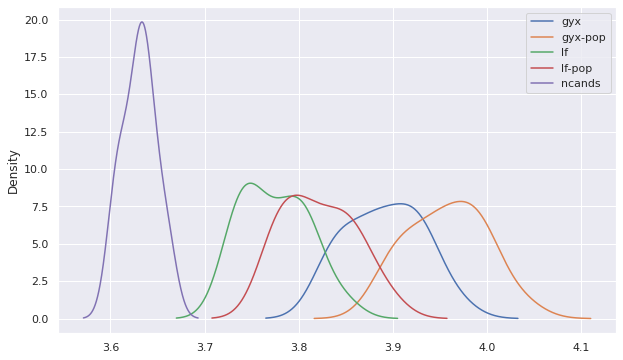

In [25]:
df.groupby('Ranking Algorithm')['Mean Steps'].plot.density(figsize=(10,6))
plt.legend()
plt.show()

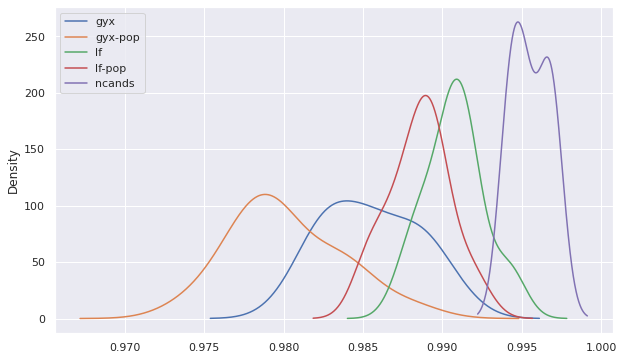

In [26]:
df.groupby('Ranking Algorithm')['Success Rate'].plot.density(figsize=(10,6))
plt.legend()
plt.show()

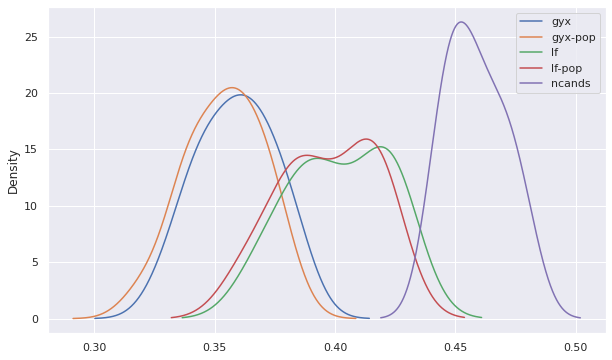

In [27]:
df.groupby('Ranking Algorithm')['3-Steps or Less'].plot.density(figsize=(10,6))
plt.legend()
plt.show()

In [28]:
df.sort_values('Mean Steps').groupby('Ranking Algorithm').first()

,Seed Word,Mean Steps,Success Rate,3-Steps or Less,Worst Case,steps_rank,success_rank,threestep_rank,avg_rank
Ranking Algorithm,,,,,,,,,
gyx,stare,3.831965,0.989201,0.377538,9,42.0,37.0,49.0,42.666667
gyx-pop,tales,3.889849,0.987905,0.366739,9,57.0,48.0,58.0,54.333333
lf,stare,3.728726,0.991793,0.423758,9,16.0,20.5,19.0,18.500000
lf-pop,tores,3.770194,0.992225,0.417279,8,24.0,18.0,25.5,22.500000
ncands,tales,3.601728,0.997408,0.467387,8,1.0,1.0,5.0,2.333333


In [29]:
# Check remaining words
df.pivot_table(index='Seed Word', values='Mean Steps', columns=['Ranking Algorithm'], aggfunc='count')

Ranking Algorithm,gyx,gyx-pop,lf,lf-pop,ncands
Seed Word,,,,,
arles,1.0,1.0,1.0,1.0,1.0
arose,1.0,1.0,1.0,1.0,1.0
dares,1.0,1.0,1.0,1.0,1.0
lares,1.0,1.0,1.0,1.0,1.0
lores,1.0,1.0,1.0,1.0,1.0
nares,1.0,1.0,1.0,1.0,1.0
raile,1.0,1.0,1.0,1.0,1.0
raise,1.0,1.0,1.0,1.0,1.0
rales,1.0,1.0,1.0,1.0,1.0


In [30]:
import statsmodels.api as sm
X = df[['Seed Word', 'Ranking Algorithm']].copy()
X.loc[X['Seed Word'].eq('stare'), 'Seed Word'] = '0stare'
X = pd.get_dummies(X, drop_first=True)
X['const'] = 1.0
y1 = df['Mean Steps']
y2 = df['Success Rate']
y3 = df['3-Steps or Less']

lm1 = sm.OLS(y1, X)
lm2 = sm.OLS(y2, X)
lm3 = sm.OLS(y3, X)

res1 = lm1.fit()
res2 = lm2.fit()
res3 = lm3.fit()

In [31]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mean Steps   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           8.13e-43
Time:                        10:15:00   Log-Likelihood:                 217.95
No. Observations:                  83   AIC:                            -393.9
Df Residuals:                      62   BIC:                            -343.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Seed Word_arles               0.0505      0.013      3.937      0.000       0.025       0.076
Seed Word_arose               0.0315      0.013      2.461      0.017       0.006       0.057
Seed Word_dares               0.0977      0.013      7.625      0.000       0.072       0.123
Seed Word_lares               0.0569      0.013      4.443      0.000       0.031       0.083
Seed Word_lores               0.0963      0.013      7.517      0.000       0.071       0.122
Seed Word_nares               0.0766      0.013      5.980      0.000       0.051       0.102
Seed Word_raile               0.0454      0.013      3.546      0.001       0.020       0.071
Seed Word_raise               0.0398      0.013      3.108      0.003       0.014       0.065
Seed Word_rales               0.0669      0.013      5.218      0.000       0.041       0.092
Seed Word_rates               0.0498      0.013      3.883      0.000       0.024       0.075
Seed Word_reais               0.0771      0.013      6.020      0.000       0.052       0.103
Seed Word_roate               0.0134      0.013      1.045      0.300      -0.012       0.039
Seed Word_soare               0.0332      0.013      2.589      0.012       0.008       0.059
Seed Word_tales               0.0077      0.013      0.600      0.551      -0.018       0.033
Seed Word_tares               0.0040      0.014      0.290      0.773      -0.023       0.031
Seed Word_tores               0.0128      0.014      0.939      0.351      -0.014       0.040
Ranking Algorithm_gyx-pop     0.0660      0.007      9.503      0.000       0.052       0.080
Ranking Algorithm_lf         -0.1164      0.007    -16.749      0.000      -0.130      -0.103
Ranking Algorithm_lf-pop     -0.0698      0.007    -10.040      0.000      -0.084      -0.056
Ranking Algorithm_ncands     -0.2652      0.007    -36.662      0.000      -0.280      -0.251
const                         3.8465      0.010    381.630      0.000       3.826       3.867
==============================================================================
Omnibus:                       27.068   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.141
Skew:                          -0.057   Prob(JB):                       0.0765
Kurtosis:                       1.786   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Success Rate   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     34.36
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           5.63e-25
Time:                        12:19:41   Log-Likelihood:                 400.61
No. Observations:                  79   AIC:                            -759.2
Df Residuals:                      58   BIC:                            -709.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Seed Word_arles              -0.0003      0.001     -0.308      0.759      -0.003       0.002
Seed Word_arose              -0.0035      0.001     -3.160      0.003      -0.006      -0.001
Seed Word_dares              -0.0024      0.001     -2.158      0.035      -0.005      -0.000
Seed Word_lares              -0.0011      0.001     -1.002      0.321      -0.003       0.001
Seed Word_lores              -0.0028      0.001     -2.466      0.017      -0.005      -0.001
Seed Word_nares              -0.0021      0.001     -1.850      0.069      -0.004       0.000
Seed Word_raile              -0.0048      0.001     -4.316      0.000      -0.007      -0.003
Seed Word_raise              -0.0034      0.001     -3.006      0.004      -0.006      -0.001
Seed Word_rales              -0.0007      0.001     -0.617      0.540      -0.003       0.002
Seed Word_rates              -0.0009      0.001     -0.743      0.461      -0.003       0.002
Seed Word_reais              -0.0038      0.001     -3.183      0.002      -0.006      -0.001
Seed Word_roate              -0.0014      0.001     -1.195      0.237      -0.004       0.001
Seed Word_soare              -0.0041      0.001     -3.700      0.000      -0.006      -0.002
Seed Word_tales               0.0032      0.001      2.692      0.009       0.001       0.006
Seed Word_tares               0.0003      0.001      0.251      0.802      -0.002       0.003
Seed Word_tores              -0.0008      0.001     -0.652      0.517      -0.003       0.002
Ranking Algorithm_gyx-pop    -0.0054      0.001     -8.820      0.000      -0.007      -0.004
Ranking Algorithm_lf          0.0052      0.001      8.611      0.000       0.004       0.006
Ranking Algorithm_lf-pop      0.0030      0.001      4.974      0.000       0.002       0.004
Ranking Algorithm_ncands      0.0105      0.001     14.975      0.000       0.009       0.012
const                         0.9872      0.001   1117.029      0.000       0.985       0.989
==============================================================================
Omnibus:                        1.070   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.968
Skew:                          -0.036   Prob(JB):                        0.616
Kurtosis:                       2.463   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        3-Steps or Less   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     73.54
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           7.24e-34
Time:                        12:19:52   Log-Likelihood:                 274.44
No. Observations:                  79   AIC:                            -506.9
Df Residuals:                      58   BIC:                            -457.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Seed Word_arles              -0.0256      0.006     -4.620      0.000      -0.037      -0.014
Seed Word_arose              -0.0055      0.006     -0.999      0.322      -0.017       0.006
Seed Word_dares              -0.0461      0.006     -8.334      0.000      -0.057      -0.035
Seed Word_lares              -0.0269      0.006     -4.854      0.000      -0.038      -0.016
Seed Word_lores              -0.0418      0.006     -7.554      0.000      -0.053      -0.031
Seed Word_nares              -0.0339      0.006     -6.118      0.000      -0.045      -0.023
Seed Word_raile              -0.0056      0.006     -1.014      0.315      -0.017       0.005
Seed Word_raise              -0.0098      0.006     -1.779      0.080      -0.021       0.001
Seed Word_rales              -0.0320      0.006     -5.774      0.000      -0.043      -0.021
Seed Word_rates              -0.0202      0.006     -3.420      0.001      -0.032      -0.008
Seed Word_reais              -0.0277      0.006     -4.701      0.000      -0.040      -0.016
Seed Word_roate               0.0023      0.006      0.386      0.701      -0.010       0.014
Seed Word_soare              -0.0066      0.006     -1.186      0.240      -0.018       0.005
Seed Word_tales              -0.0142      0.006     -2.414      0.019      -0.026      -0.002
Seed Word_tares              -0.0017      0.006     -0.291      0.772      -0.014       0.010
Seed Word_tores              -0.0019      0.006     -0.327      0.745      -0.014       0.010
Ranking Algorithm_gyx-pop    -0.0050      0.003     -1.676      0.099      -0.011       0.001
Ranking Algorithm_lf          0.0434      0.003     14.448      0.000       0.037       0.049
Ranking Algorithm_lf-pop      0.0383      0.003     12.747      0.000       0.032       0.044
Ranking Algorithm_ncands      0.1041      0.003     29.943      0.000       0.097       0.111
const                         0.3763      0.004     86.216      0.000       0.368       0.385
==============================================================================
Omnibus:                        8.256   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                3.614
Skew:                           0.247   Prob(JB):                        0.164
Kurtosis:                       2.076   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
df.groupby('Seed Word')['Ranking Algorithm'].count()

Seed Word
arles    2
arose    2
dares    2
lares    2
lores    2
nares    2
raile    2
raise    2
rales    2
rates    2
reais    2
roate    2
soare    2
stare    2
tales    2
tares    2
tores    2
Name: Ranking Algorithm, dtype: int64

## All Data

In [15]:
if 'Unnamed: 0' in all_data.columns:
    all_data = all_data.drop('Unnamed: 0', axis=1)
all_data['words'] = all_data.words.apply(eval)
all_data['word'] = all_data.words.apply(lambda x: x[0])
all_data['solution'] = all_data.words.apply(lambda x: x[-1])

In [23]:
unsolved = all_data.groupby(['solution', 'method']).steps.mean().reset_index()
unsolved = unsolved.loc[unsolved.steps.gt(6)].sort_values('steps', ascending=False)

In [26]:
pd.options.display.max_rows=100
unsolved.sort_values('solution')

,solution,method,steps
292,baker,gyx,6.117647
317,baste,lf,6.941176
316,baste,gyx,7.235294
318,batch,gyx,7.294118
460,bluer,gyx,6.117647
514,boxer,gyx,7.823529
515,boxer,lf,7.764706
579,brown,lf,6.411765
578,brown,gyx,6.294118
624,buyer,gyx,6.529412


In [38]:
import wordlebot

from wordlebot import Wordle

In [39]:
wordle_candidates, wordle_answers = wordlebot.load_data('data')
wordle = wordle_candidates.loc[
    wordle_candidates.word.apply(lambda x: len(x)==len(set(x)))
].append(wordle_answers).reset_index(drop=True)

word_popularity = wordlebot.load_word_popularity('data')

In [43]:
game = wordlebot.Wordle(wordle, wordle_answers)

In [44]:
game.guess('soare', 'gxggx')

SOARE --> GXGGX: 11 solutions remaining.


In [45]:
game.optimise('ncands')

  0%|          | 0/11 [00:00<?, ?it/s]

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-2)]: Done 121 out of 121 | elapsed:    0.1s finished


,word,ncands_max,ncands_mean,nbuckets,bucket_entropy,ncands_max_rank,ncands_mean_rank,bucket_entropy_rank,avg_rank
0,stark,6,3.909091,5,1.294545,1.5,1.0,1.0,1.25
1,shark,6,4.090909,4,1.168518,1.5,2.0,2.0,1.75
2,smart,7,4.818182,5,1.159589,4.0,3.0,3.0,3.50
3,sharp,7,5.000000,4,1.033562,4.0,4.5,4.5,4.25
4,spark,7,5.000000,4,1.033562,4.0,4.5,4.5,4.25
5,start,8,6.090909,4,0.885574,6.5,6.0,6.0,6.25
6,shard,8,6.272727,3,0.759547,6.5,7.0,7.0,6.75
7,scarf,9,7.545455,3,0.600166,9.0,9.0,9.0,9.00
8,scary,9,7.545455,3,0.600166,9.0,9.0,9.0,9.00
9,swarm,9,7.545455,3,0.600166,9.0,9.0,9.0,9.00


In [46]:
game.guess('stark', 'gxggx')

STARK --> GXGGX: 6 solutions remaining.


In [47]:
game.optimise('ncands')

  0%|          | 0/6 [00:00<?, ?it/s]

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 out of  36 | elapsed:    0.1s finished


,word,ncands_max,ncands_mean,nbuckets,bucket_entropy,ncands_max_rank,ncands_mean_rank,bucket_entropy_rank,avg_rank
0,scarf,4,3.000000,3,0.867563,2.5,2.5,2.5,2.5
1,scary,4,3.000000,3,0.867563,2.5,2.5,2.5,2.5
2,shard,4,3.000000,3,0.867563,2.5,2.5,2.5,2.5
3,sharp,4,3.000000,3,0.867563,2.5,2.5,2.5,2.5
4,snarl,5,4.333333,2,0.450561,5.5,5.5,5.5,5.5
5,swarm,5,4.333333,2,0.450561,5.5,5.5,5.5,5.5


In [48]:
game.guess('scarf', 'gxggx')
game.optimise('ncands')

SCARF --> GXGGX: 4 solutions remaining.


  0%|          | 0/4 [00:00<?, ?it/s]

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-2)]: Done  16 out of  16 | elapsed:    0.1s finished


,word,ncands_max,ncands_mean,nbuckets,bucket_entropy,ncands_max_rank,ncands_mean_rank,bucket_entropy_rank,avg_rank
0,shard,2,1.5,3,1.039721,1.5,1.5,1.5,1.5
1,sharp,2,1.5,3,1.039721,1.5,1.5,1.5,1.5
2,snarl,3,2.5,2,0.562335,3.5,3.5,3.5,3.5
3,swarm,3,2.5,2,0.562335,3.5,3.5,3.5,3.5
